# Description

TODO

- rename this file to be 27-

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS"] / "null_simulations"
display(INPUT_DIR)

PosixPath('/opt/data/results/gls/null_simulations')

# Functions

In [3]:
def show_prop(data, frac=0.05):
    _pvalue_lt_frac = data[data["pvalue"] < frac]
    #     display(_pvalue_lt_frac.head())
    display(_pvalue_lt_frac.shape[0] / data.shape[0])

# Null simulations - Elastic net models

In [4]:
INPUT_FILENAME = INPUT_DIR / "en-null_simulations.pkl"
display(INPUT_FILENAME)
assert INPUT_FILENAME.exists()

PosixPath('/opt/data/results/gls/null_simulations/en-null_simulations.pkl')

## Load data

In [5]:
results = pd.read_pickle(INPUT_FILENAME)

In [6]:
results.shape

(987, 4)

In [7]:
results.head()

,phenotype,lv,coef,pvalue
0,smultixcan phenotype 0,LV936,-0.001195,0.538070
1,smultixcan phenotype 0,LV962,0.000033,0.498970
2,smultixcan phenotype 0,LV248,0.028117,0.013027
3,smultixcan phenotype 0,LV895,0.009369,0.229212
4,smultixcan phenotype 0,LV368,0.007564,0.274593


## Proportion pvalue < 0.05

In [8]:
show_prop(results, 0.01)

0.020263424518743668

In [9]:
show_prop(results, 0.05)

0.06788247213779129

In [10]:
show_prop(results, 0.10)

0.11246200607902736

In [11]:
show_prop(results, 0.15)

0.1702127659574468

In [12]:
show_prop(results, 0.20)

0.20871327254305977

## Plot

In [13]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [14]:
display(data[:5])
display(uniform_data[:5])

array([0.53807025, 0.49896982, 0.01302737, 0.22921228, 0.27459299])

array([2.53767853e-05, 1.03886103e-03, 2.05234528e-03, 3.06582953e-03,
       4.07931377e-03])

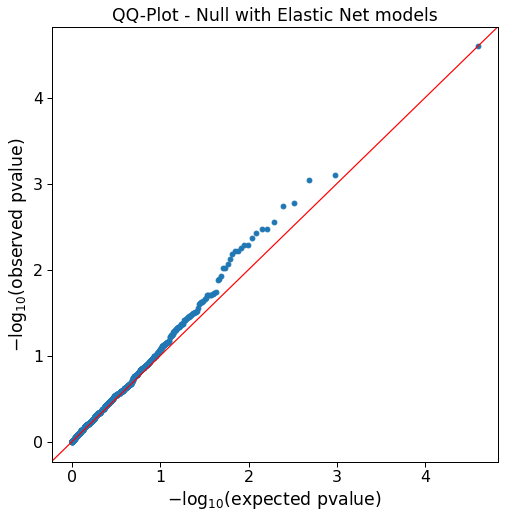

In [15]:
with sns.plotting_context("paper", font_scale=1.8):
    fig, ax = plt.subplots(figsize=(8, 8))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null with Elastic Net models")